In [21]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm # import statsmodels 
from statsmodels.formula.api import ols


In [22]:
df = pd.read_csv("../Data/Replaced.csv",encoding="ISO-8859-1")

In [23]:
df.columns

Index(['Unnamed: 0', 'id', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name',
       'reviewsdate', 'dateSeen', 'didPurchase', 'doRecommend', 'reviews_id',
       'reviews.numHelpful', 'rating', 'sourceURLs', 'text', 'title',
       'userCity', 'userProvince', 'username', 'upc'],
      dtype='object')

#### Convert boolean values to binary values i.e. True to 1 and False to 0

In [24]:
df.didPurchase = (df.didPurchase)*1
df.doRecommend = (df.doRecommend)*1

df['doRecommend'] = df['doRecommend'].fillna(1)
df['didPurchase'] = df['didPurchase'].fillna(1)

In [25]:
df.doRecommend.dtype

dtype('int64')

#### Set predictor columns to determine and evaluate the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            doRecommend   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                 2.323e+04
Date:                Fri, 17 Aug 2018   Prob (F-statistic):               0.00
Time:                        22:35:09   Log-Likelihood:                 14960.
No. Observations:               71003   AIC:                        -2.991e+04
Df Residuals:                   71000   BIC:                        -2.989e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2638      0.003     82.334      0.000       0.258       0.270
didPurchase     0.0435      0.002     28.957      0.000       0.041       0.046
rating          0.1464      0.001    212.057      0.000       0.145       0.148
==============================================================================
Omnibus:                    21851.970   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135317.736
Skew:                          -1.339   Prob(JB):                         0.00
Kurtosis:                       9.210   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

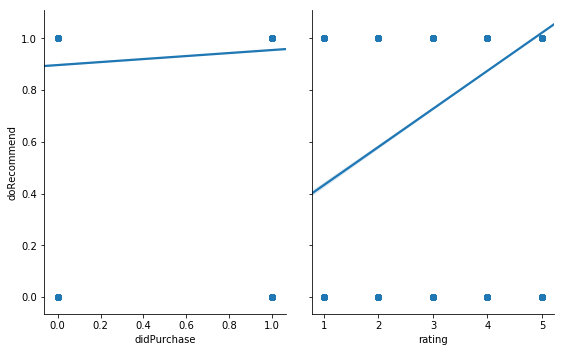

In [26]:
X=df[['didPurchase','rating']]
y=df['doRecommend']
X = sm.add_constant(X) 
sns.pairplot(df, x_vars=['didPurchase','rating',], y_vars=["doRecommend"], size=5, aspect=.8, kind="reg");


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

model = sm.OLS(y, X)
results = model.fit()

# Statsmodels gives R-like statistical output
results.summary()

#### dividing data to have a training and a testing set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Finding the optimal accuracy score using LinearRegression algorithm

Score: 0.4043335291831772


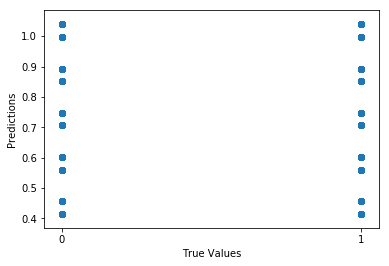

In [28]:
lm = linear_model.LinearRegression()
model_ = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xticks([0,1],['0','1'])
print ("Score:", model_.score(X_test, y_test))


### Using Linear Regression, the accuracy score is ~40.5% for user to likely to recommend a product.

In [29]:
from sklearn.model_selection import RepeatedKFold

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Train: [    0     1     3 ... 71000 71001 71002] Validation: [    2     6     7 ... 70986 70996 70997]
Train: [    0     1     2 ... 70997 71000 71002] Validation: [   17    18    24 ... 70998 70999 71001]
Train: [    0     1     2 ... 71000 71001 71002] Validation: [   11    14    16 ... 70974 70984 70993]
Train: [    0     2     3 ... 70999 71001 71002] Validation: [    1    13    19 ... 70992 70995 71000]
Train: [    1     2     6 ... 70999 71000 71001] Validation: [    0     3     4 ... 70991 70994 71002]
Train: [    0     1     3 ... 71000 71001 71002] Validation: [    2     4     9 ... 70981 70983 70994]
Train: [    0     1     2 ... 71000 71001 71002] Validation: [    3    19    20 ... 70990 70991 70992]
Train: [    0     1     2 ... 70999 71001 71002] Validation: [    6     7    22 ... 70995 70996 71000]
Train: [    1     2     3 ... 70999 71000 71002] Validation: [    0     5     8 ... 70982 70998 71001]
Train: [    0     2     3 ... 70998 71000 71001] Validation: [    1    11

#### Create confusion matrix

In [30]:
pd.crosstab(y_test, predictions[:-1].copy(), rownames=['Actual'], colnames=['Predicted'])

Predicted,0.4155466194801696,0.4573189268095137,0.560838167450816,0.6026104747801602,0.7061297154214626,0.7479020227508069,0.8514212633921092,0.8931935707214533,0.9967128113627558,1.0384851186920998
Actual,,,,,,,,,,
0,26,19,7,13,20,33,59,127,276,368
1,420,263,158,175,291,578,828,1859,3537,5143


In [31]:
predictions[:-1].copy().shape

(14200,)

In [32]:
y

0        1
1        1
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       0
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
70973    1
70974    1
70975    1
70976    1
70977    1
70978    1
70979    1
70980    1
70981    1
70982    1
70983    1
70984    1
70985    1
70986    1
70987    1
70988    1
70989    1
70990    1
70991    1
70992    1
70993    1
70994    1
70995    1
70996    1
70997    1
70998    1
70999    1
71000    1
71001    1
71002    1
Name: doRecommend, Length: 71003, dtype: int64